In [ ]:
!pip install monai scikit-learn matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 120.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install --upgrade --force-reinstall numpy torch torchvision



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 123.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 136.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import os, torch, numpy as np
from glob import glob
from collections import defaultdict, Counter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import accuracy_score, f1_score

from monai.transforms import (
    Compose, LoadImaged, EnsureChannelFirstd, RepeatChanneld,
    Resized, NormalizeIntensityd, ToTensord,
    RandFlipd, RandAffined, RandGaussianSmoothd, RandAdjustContrastd,Identityd,

)
from monai.data import CacheDataset, DataLoader
from monai.networks.nets import DenseNet121
import torch.nn as nn

from torch.optim import AdamW
from torch.utils.data import WeightedRandomSampler


In [ ]:
torch.backends.cudnn.benchmark = True
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
data_dir = "/content/drive/MyDrive/ml/alz/data"

label_to_index = {"CN": 0, "MCI": 1, "AD": 2}
patient_to_paths = defaultdict(list)
patient_to_label = {}

for label_name in os.listdir(data_dir):
    label_path = os.path.join(data_dir, label_name)
    if not os.path.isdir(label_path):
        continue
    for png_path in glob(os.path.join(label_path, "*.png")):
        name = os.path.basename(png_path)
        if "_" not in name:
            continue
        parts = name.split("_")
        if len(parts) < 3:
            continue
        patient_id = parts[1]
        lbl_idx = label_to_index[label_name]
        patient_to_paths[patient_id].append(png_path)
        patient_to_label[patient_id] = lbl_idx

patient_ids = np.array(list(patient_to_paths.keys()))
labels_per_pid = np.array([patient_to_label[pid] for pid in patient_ids])

train_ids, test_ids = train_test_split(
    patient_ids, test_size=0.1, stratify=labels_per_pid, random_state=42)
train_ids, val_ids  = train_test_split(
    train_ids, test_size=0.1/0.9,
    stratify=[patient_to_label[pid] for pid in train_ids],
    random_state=42)

def make_dicts(pid_list):
    out = []
    for pid in pid_list:
        for path in patient_to_paths[pid]:
            out.append({
                "image": path,
                "label": patient_to_label[pid],
                "pid":   pid
            })
    return out


train_dicts = make_dicts(train_ids)
val_dicts   = make_dicts(val_ids)
test_dicts  = make_dicts(test_ids)

In [ ]:
print("Samples  | CN  MCI  AD")
for name, d in zip(("train", "val", "test"),
                   (train_dicts, val_dicts, test_dicts)):
    c = Counter(e["label"] for e in d)
    print(f"{name:6s}: {len(d):5d} | {c[0]:3d} {c[1]:4d} {c[2]:4d}")


Samples  | CN  MCI  AD
train : 16800 | 4984 8680 3136
val   :  2100 | 630 1078  392
test  :  2100 | 630 1078  392


In [ ]:
train_tf = Compose([
    LoadImaged(keys=["image"]),
    Identityd(keys=["pid"]),
    EnsureChannelFirstd(keys=["image"]),
    RepeatChanneld(keys=["image"], repeats=3),
    RandFlipd(keys=["image"], spatial_axis=1, prob=0.5),
    RandAffined(keys=["image"], prob=0.4,
                rotate_range=(-np.pi/18, np.pi/18),
                translate_range=(15,15), scale_range=(0.1,0.1)),
    RandGaussianSmoothd(keys=["image"], prob=0.3, sigma_x=(0.5,1.5)),
    RandAdjustContrastd(keys=["image"], prob=0.3, gamma=(0.7,1.3)),
    Resized(keys=["image"], spatial_size=(224,224)),
    NormalizeIntensityd(keys=["image"], channel_wise=True),
    ToTensord(keys=["image","label"]),
])

common_tf = Compose([
    LoadImaged(keys=["image"]),
    Identityd(keys=["pid"]),
    EnsureChannelFirstd(keys=["image"]),
    RepeatChanneld(keys=["image"], repeats=3),
    Resized(keys=["image"], spatial_size=(224,224)),
    NormalizeIntensityd(keys=["image"], channel_wise=True),
    ToTensord(keys=["image","label"]),
])

train_ds = CacheDataset(train_dicts, train_tf, cache_rate=1.0, num_workers=8)
val_ds   = CacheDataset(val_dicts,   common_tf, cache_rate=1.0, num_workers=8)
test_ds  = CacheDataset(test_dicts,  common_tf, cache_rate=1.0, num_workers=8)


Loading dataset: 100%|██████████| 2100/2100 [00:57<00:00, 36.54it/s]


In [ ]:
train_lbls = [d["label"] for d in train_dicts]
class_freq = Counter(train_lbls)
n_samples  = len(train_lbls)
cls_wt     = {c: n_samples/class_freq[c] for c in class_freq}
sampler    = WeightedRandomSampler([cls_wt[l] for l in train_lbls],
                                   num_samples=n_samples, replacement=True)

loader_kwargs = dict(
    batch_size = 64,
    num_workers = 8,
    pin_memory = False,
    persistent_workers = False,
    prefetch_factor = 4
)

train_loader = DataLoader(train_ds, sampler=sampler, shuffle=False, **loader_kwargs)
val_loader   = DataLoader(val_ds,   shuffle=False, **loader_kwargs)
test_loader  = DataLoader(test_ds,  shuffle=False, **loader_kwargs)


In [ ]:
model = DenseNet121(spatial_dims=2, in_channels=3, out_channels=3).to(device)

model.class_layers = nn.Sequential(nn.Dropout(0.4), model.class_layers)

for p in model.parameters(): p.requires_grad = False
for n, p in model.named_parameters():
    if any(k in n for k in ("denseblock4", "norm5", "class_layers")):
        p.requires_grad = True

trainable = [p for p in model.parameters() if p.requires_grad]
optimizer  = AdamW(trainable, lr=3e-4, weight_decay=5e-4)
scheduler  = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=30)

weight_vec = torch.tensor([cls_wt.get(i,1.0) for i in range(3)],
                          dtype=torch.float32, device=device)
loss_fn = nn.CrossEntropyLoss(weight=weight_vec, label_smoothing=0.05)

scaler = torch.cuda.amp.GradScaler()

weight_vec = torch.tensor([cls_wt.get(i,1.0) for i in range(3)],
                          device=device)

<ipython-input-8-306a8698ff0b>:18: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()


In [ ]:
def extract_patient_id(path):
    """Извлекает patient ID из имени файла"""
    return os.path.basename(path).split("_")[1]

train_ids = set(extract_patient_id(d["image"]) for d in train_dicts)
val_ids   = set(extract_patient_id(d["image"]) for d in val_dicts)
test_ids  = set(extract_patient_id(d["image"]) for d in test_dicts)

print(f"Train & Val  = {len(train_ids & val_ids)} пересечений")
print(f"Train & Test = {len(train_ids & test_ids)} пересечений")
print(f"Val   & Test = {len(val_ids & test_ids)} пересечений")



Train & Val  = 0 пересечений
Train & Test = 0 пересечений
Val   & Test = 0 пересечений


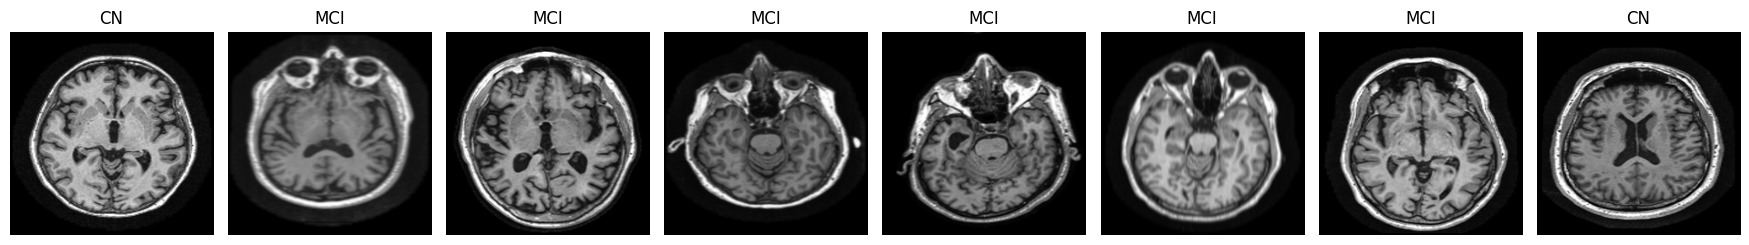

In [ ]:
import random
import matplotlib.pyplot as plt
import torch


index_to_label = {0: "CN", 1: "MCI", 2: "AD"}

def show_random_samples(loader, n=8):
    """
    Выводит n случайных элементов из датасета, привязанного к loader.
    Предполагает, что элементы – словари с ключами "image", "label".
    """
    ds = loader.dataset
    idxs = random.sample(range(len(ds)), n)

    plt.figure(figsize=(2.2 * n, 3.5))
    for i, idx in enumerate(idxs):
        sample = ds[idx]
        img    = sample["image"]
        label  = sample["label"]

        img = img.cpu().permute(1, 2, 0)
        img = (img - img.min()) / (img.max() - img.min() + 1e-8)

        plt.subplot(1, n, i + 1)
        plt.imshow(img.numpy())
        plt.title(index_to_label[int(label)])
        plt.axis("off")

    plt.tight_layout()
    plt.show()

show_random_samples(train_loader, n=8)

In [ ]:
from torch.amp import autocast
from torch.cuda.amp import GradScaler
import torch.nn.functional as F
def run_epoch(loader, train=True):
    mdl = model.train() if train else model.eval()
    loss_sum, preds, tgts = 0., [], []
    patient_logits, patient_labels = defaultdict(list), {}

    for batch in tqdm(loader, leave=False):
        x = batch["image"].to(device)
        y = batch["label"].long().to(device)
        pids = batch["pid"]

        with autocast("cuda"):
            out  = mdl(x)
            loss = F.cross_entropy(
                out, y,
                weight=weight_vec.to(out.dtype),
                label_smoothing=0.05
            )

        if train:
            optimizer.zero_grad()
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

        loss_sum += loss.item()

        if train:
            preds.extend(out.argmax(1).cpu().numpy())
            tgts.extend(y.cpu().numpy())
        else:
            for pid, logit, lbl in zip(pids, out.cpu(), y.cpu()):
                patient_logits[pid].append(logit)
                patient_labels[pid] = lbl.item()

    if train:
        return loss_sum/len(loader), preds, tgts


    agg_preds, agg_tgts = [], []
    for pid, logs in patient_logits.items():
        agg_preds.append(torch.stack(logs).mean(0).argmax().item())
        agg_tgts.append(patient_labels[pid])
    return loss_sum/len(loader), agg_preds, agg_tgts
best_f1, patience, trigger = 0., 8, 0
for epoch in range(1, 31):
    tr_loss, tr_preds, tr_tgts = run_epoch(train_loader, train=True)
    val_loss, val_preds, val_tgts = run_epoch(val_loader, train=False)

    tr_acc = accuracy_score(tr_tgts, tr_preds)
    val_acc = accuracy_score(val_tgts, val_preds)
    tr_f1  = f1_score(tr_tgts, tr_preds, average="macro")
    val_f1 = f1_score(val_tgts, val_preds, average="macro")
    print(f"E{epoch:02d}  loss {tr_loss:.3f}/{val_loss:.3f} | "
          f"acc {tr_acc:.3f}/{val_acc:.3f} | f1 {tr_f1:.3f}/{val_f1:.3f}")

    if val_f1 > best_f1:
        best_f1, trigger = val_f1, 0
        torch.save(model.state_dict(), "/content/drive/MyDrive/ml/alz/best_drop.pth")
        print("  ** new best saved")
    else:
        trigger += 1
        if trigger >= patience:
            print("Early stop"); break


    if epoch == 6:
        for name, param in model.named_parameters():
            if "denseblock3" in name or "transition3" in name:
                param.requires_grad = True


        existing_ids = {id(p)
                        for g in optimizer.param_groups
                        for p in g["params"]}

        new_params = [p for p in model.parameters()
                    if p.requires_grad and id(p) not in existing_ids]

        if new_params:
            optimizer.add_param_group(
                {"params": new_params, "lr": 1e-4})
            print(f">>> denseblock3 unfrozen — добавлено {len(new_params)} параметров")
        else:
            print(">>> denseblock3 уже был разморожен — новых параметров нет")


    scheduler.step()

E01  loss 0.954/1.244 | acc 0.431/0.353 | f1 0.338/0.301
  ** new best saved


E02  loss 0.860/1.080 | acc 0.503/0.387 | f1 0.407/0.352
  ** new best saved


E03  loss 0.792/1.255 | acc 0.554/0.367 | f1 0.477/0.268


E04  loss 0.735/1.087 | acc 0.595/0.520 | f1 0.540/0.509
  ** new best saved


E05  loss 0.697/1.001 | acc 0.628/0.607 | f1 0.587/0.581
  ** new best saved


E06  loss 0.648/0.984 | acc 0.664/0.680 | f1 0.630/0.646
  ** new best saved
>>> denseblock3 unfrozen — добавлено 147 параметров


E07  loss 0.639/1.189 | acc 0.670/0.433 | f1 0.640/0.440


E08  loss 0.597/1.158 | acc 0.705/0.573 | f1 0.685/0.573


E09  loss 0.555/1.146 | acc 0.737/0.633 | f1 0.724/0.569


E10  loss 0.531/1.090 | acc 0.758/0.620 | f1 0.746/0.585


E11  loss 0.495/1.087 | acc 0.779/0.567 | f1 0.770/0.566
Early stop


In [ ]:

student = DenseNet121(spatial_dims=2, in_channels=3, out_channels=3).to(device)
student.class_layers = nn.Sequential(nn.Dropout(0.4), student.class_layers)
student.load_state_dict(torch.load("/content/drive/MyDrive/ml/alz/best_drop.pth",
                                   map_location=device))

teacher = DenseNet121(spatial_dims=2, in_channels=3, out_channels=3).to(device)
teacher.class_layers = nn.Sequential(nn.Dropout(0.4), teacher.class_layers)
state = torch.load("/content/drive/MyDrive/ml/alz/best12.pth",
                   map_location=device)
teacher.load_state_dict(state, strict=False)
teacher.eval()
for p in teacher.parameters():
    p.requires_grad = False

trainable = [p for p in student.parameters() if p.requires_grad]
optimizer  = AdamW(trainable, lr=3e-4, weight_decay=5e-4)
scheduler  = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=30)
scaler     = GradScaler()

T      = 4.0
alpha  = 0.7
beta   = 0.3

kl_loss = torch.nn.KLDivLoss(reduction="batchmean")


def train_epoch_distill(loader):
    student.train()
    loss_sum, preds, tgts = 0., [], []
    for batch in tqdm(loader, leave=False):
        x = batch["image"].to(device)
        y = batch["label"].long().to(device)

        optimizer.zero_grad(set_to_none=True)
        with autocast("cuda"):
            out_s = student(x)
            with torch.no_grad():
                out_t = teacher(x) / T

            soft_s = F.log_softmax(out_s / T, dim=1)
            soft_t = F.softmax(out_t,    dim=1)
            loss_kd = kl_loss(soft_s, soft_t) * (alpha * T * T)
            loss_ce = F.cross_entropy(out_s, y, weight=weight_vec, label_smoothing=0.05)
            loss    = loss_kd + beta * loss_ce
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        loss_sum += loss.item()
        preds.extend(out_s.argmax(1).cpu().numpy())
        tgts.extend(y.cpu().numpy())

    return loss_sum/len(loader), preds, tgts


def val_epoch(loader):
    student.eval()
    loss_sum=0.; patient_logits=defaultdict(list); patient_lbl={}
    with torch.no_grad():
        for batch in tqdm(loader, leave=False):
            x = batch["image"].to(device)
            y = batch["label"].long().to(device)
            pids = batch["pid"]
            with autocast("cuda"):
                out = student(x)
                loss_sum += F.cross_entropy(out, y, weight=weight_vec).item()

            for pid, logit, lbl in zip(pids, out.cpu(), y.cpu()):
                patient_logits[pid].append(logit)
                patient_lbl[pid] = lbl.item()

    preds = [torch.stack(v).mean(0).argmax().item() for v in patient_logits.values()]
    tgts  = list(patient_lbl.values())
    return loss_sum/len(loader), preds, tgts


<ipython-input-12-bdb1671ef48c>:27: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler     = GradScaler()


In [ ]:
best_f1, patience, trig = best_f1, 8, 0
for epoch in range(1, 21):
    tr_loss, tr_preds, tr_tgts = train_epoch_distill(train_loader)
    val_loss, val_preds, val_tgts = val_epoch(val_loader)

    tr_acc = accuracy_score(tr_tgts, tr_preds)
    val_acc = accuracy_score(val_tgts, val_preds)
    tr_f1  = f1_score(tr_tgts, tr_preds, average="macro")
    val_f1 = f1_score(val_tgts, val_preds, average="macro")

    print(f"D{epoch:02d}  loss {tr_loss:.3f}/{val_loss:.3f} | "
          f"acc {tr_acc:.3f}/{val_acc:.3f} | f1 {tr_f1:.3f}/{val_f1:.3f}")

    if val_f1 > best_f1:
        best_f1, trig = val_f1, 0
        torch.save(student.state_dict(), "/content/drive/MyDrive/ml/alz/best_distill.pth")
        print("  ** distill-best saved")
    else:
        trig += 1
        if trig >= patience:
            print("Early stop distill"); break

    scheduler.step()
    torch.cuda.empty_cache()

E01  loss 0.335/1.014 | acc 0.494/0.447 | f1 0.438/0.392
  ** distill-best saved
E02  loss 0.311/0.943 | acc 0.567/0.521 | f1 0.504/0.478
  ** distill-best saved
E03  loss 0.291/0.847 | acc 0.639/0.577 | f1 0.584/0.528
  ** distill-best saved
E04  loss 0.270/0.739 | acc 0.702/0.637 | f1 0.649/0.612
  ** distill-best saved
E05  loss 0.248/0.602 | acc 0.761/0.701 | f1 0.710/0.675
  ** distill-best saved
E06  loss 0.228/0.470 | acc 0.811/0.778 | f1 0.763/0.754
  ** distill-best saved
E07  loss 0.210/0.389 | acc 0.851/0.838 | f1 0.801/0.817
  ** distill-best saved
E08  loss 0.193/0.321 | acc 0.884/0.878 | f1 0.832/0.861
  ** distill-best saved
E09  loss 0.180/0.270 | acc 0.904/0.899 | f1 0.859/0.887
  ** distill-best saved
E10  loss 0.168/0.226 | acc 0.918/0.916 | f1 0.878/0.906
  ** distill-best saved
E11  loss 0.158/0.192 | acc 0.928/0.930 | f1 0.893/0.922
  ** distill-best saved
E12  loss 0.149/0.164 | acc 0.935/0.939 | f1 0.905/0.931
  ** distill-best saved
E13  loss 0.141/0.143 | acc 

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = DenseNet121(spatial_dims=2, in_channels=3, out_channels=3).to(device)
model.load_state_dict(torch.load("/content/drive/MyDrive/ml/alz/best14.pth"))

for param in model.parameters():
    param.requires_grad = False

for name, param in model.named_parameters():
    if any(k in name for k in ["denseblock3", "denseblock4", "norm5", "class_layers"]):
        param.requires_grad = True

trainable_params = filter(lambda p: p.requires_grad, model.parameters())
optimizer = torch.optim.Adam(trainable_params, lr=5e-5, weight_decay=1e-4)

class_weights = torch.tensor([1.0, 1.5, 2.0]).to(device)
loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

In [ ]:
from tqdm import tqdm
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt

num_epochs = 3
train_losses, val_losses = [], []
train_accs, val_accs = [], []


for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    model.train()
    train_preds, train_targets = [], []
    total_loss = 0

    for batch in tqdm(train_loader, desc="Training", leave=False):
        x, y = batch["image"].to(device), batch["label"].long().to(device)
        optimizer.zero_grad()
        out = model(x)
        loss = loss_fn(out, y)
        loss.backward()
        optimizer.step()

        preds = out.argmax(dim=1).detach().cpu().numpy()
        train_preds.extend(preds)
        train_targets.extend(y.cpu().numpy())
        total_loss += loss.item()

    train_f1 = f1_score(train_targets, train_preds, average='macro')
    train_acc = accuracy_score(train_targets, train_preds)
    train_losses.append(total_loss / len(train_loader))
    train_accs.append(train_acc)

    # Validation
    model.eval()
    val_preds, val_targets = [], []
    val_loss = 0
    with torch.no_grad():
        for batch in tqdm(val_loader, desc="Validation", leave=False):
            x, y = batch["image"].to(device), batch["label"].long().to(device)
            out = model(x)
            loss = loss_fn(out, y)
            preds = out.argmax(dim=1).cpu().numpy()

            val_preds.extend(preds)
            val_targets.extend(y.cpu().numpy())
            val_loss += loss.item()

    val_f1 = f1_score(val_targets, val_preds, average='macro')
    val_acc = accuracy_score(val_targets, val_preds)
    val_losses.append(val_loss / len(val_loader))
    val_accs.append(val_acc)

    scheduler.step()

    print(f"Train Loss: {train_losses[-1]:.4f}, Acc: {train_acc:.4f}, F1: {train_f1:.4f}")
    print(f"Val   Loss: {val_losses[-1]:.4f}, Acc: {val_acc:.4f}, F1: {val_f1:.4f}")


    if val_f1 >= max(val_accs):
        torch.save(model.state_dict(), "/content/drive/MyDrive/ml/alz/best15.pth.pth")
        print("Сохранили новую лучшую модель (frozen3_4.pth)")

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Val Loss")
    plt.title("Loss per Epoch")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label="Train Acc")
    plt.plot(val_accs, label="Val Acc")
    plt.title("Accuracy per Epoch")
    plt.legend()
    plt.show()


In [ ]:
torch.save(model.state_dict(), "/content/drive/MyDrive/ml/alz/fin.pth")

In [ ]:
model.eval()
test_preds, test_targets = [], []

with torch.no_grad():
    for batch in test_loader:
        x = batch["image"].to(device)
        y = batch["label"].to(device)
        out = model(x)
        preds = out.argmax(dim=1).cpu().numpy()
        test_preds.extend(preds)
        test_targets.extend(y.cpu().numpy())

from sklearn.metrics import classification_report
print(classification_report(test_targets, test_preds, target_names=["CN", "MCI", "AD"]))

              precision    recall  f1-score   support

          CN       0.97      0.90      0.93       630
         MCI       0.94      0.97      0.96      1078
          AD       0.94      0.97      0.95       392

    accuracy                           0.95      2100
   macro avg       0.95      0.94      0.95      2100
weighted avg       0.95      0.95      0.95      2100

